Install:

`mamba install ipykernel matplotlib scikit-learn numpy pandas`


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Read in the data


In [ ]:
df = pd.read_csv(
    "./data/TT-2018-H1-REDACTED-excluding-Postcodes.csv",
    delimiter=",",
    encoding_errors="replace",
)
df.dataframeName = "2018"

Clean up the data

In [ ]:
# Rename columns
df = df.rename(columns={
  "ISF": "age", 
  "ISI": "householdSize",
  "ISJ": "numChildrenInHousehold"
})

# Remove participants with empty age
df = df.dropna(subset=["age"])
df = df[df.age != " "]

# Make boolean columns where necessary
df['isRetired'] = np.where(df['SGC'] == "Not working (i.e. under 8hrs/wk) - retired", 1, 0)
df['isHomebound'] = np.where(df['SGF'] == "Not working (i.e. under 8hrs/wk) - housewife/ disabled/ other", 1, 0)
df['usesDVDPlayer'] = np.where(df['QB2K'] == "Not", 0, 1)
df['usesGamesTV'] = np.where(df['QB2A'] == "Not", 0, 1)
df['usesIpod'] = np.where(df['QB2C'] == "Not", 0, 1)
df['usesEbook'] = np.where(df['QB2D'] == "Not", 0, 1)
df['usesGamesHandheld'] = np.where(df['QB2B'] == "Not", 0, 1)
df['usesSmartWatch'] = np.where(df['QB2H'] == "Not", 0, 1)
df['usesSmartSpeaker'] = np.where(df['QB2I'] == "Not", 0, 1)
df['usesGamesVR'] = np.where(df['QB2J'] == "Not", 0, 1)
df['usesMobile'] = np.where(df['QD2'] == "No mobiles in household", 0, 1)
df['usesSmartphone'] = np.where(df['QD24B'] == "Yes", 1, 0)

# Convert to proper data types
df["age"] = pd.to_numeric(df["age"])

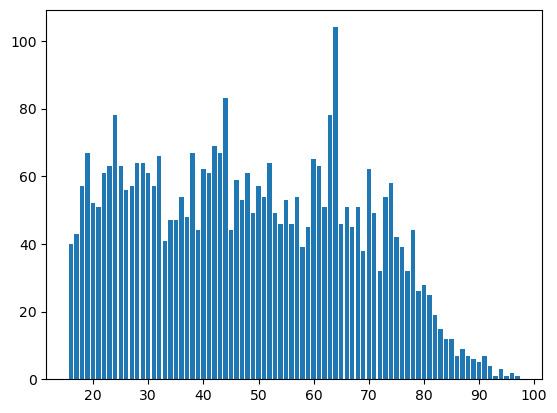

In [10]:
ageGroup = df.groupby("age")

ages = [(name) for name, group in ageGroup]
counts = [(len(group)) for name, group in ageGroup]
ageCounts = pd.DataFrame({"age": ages, "count": counts})

plt.bar("age", "count", data=ageCounts)
plt.show()

In [12]:
ageGroup.head()

,REGSAM,SPN,SE,age,SF,AGEX,QZ8A,QZ8B,QZ8C,QZ8D,...,usesDVDPlayer,usesGamesTV,usesIpod,usesEbook,usesGamesHandheld,usesSmartWatch,usesSmartSpeaker,usesGamesVR,usesMobile,usesSmartphone
0,England,126.0,Female,74,55+,7.0,Not,Not,Not,C2,...,0,0,0,0,0,0,0,0,1,0
1,England,126.0,Male,40,35 - 44,4.0,Not,Not,C1,Not,...,1,0,0,0,0,0,0,0,1,1
2,England,126.0,Female,55,55+,6.0,Not,B,Not,Not,...,1,0,0,0,0,0,0,0,1,1
3,England,126.0,Female,28,25 - 34,3.0,Not,Not,Not,C2,...,1,0,0,0,0,0,0,0,1,1
4,England,126.0,Male,52,45 - 54,5.0,Not,B,Not,Not,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,England,197.0,Male,92,55+,8.0,Not,Not,Not,Not,...,0,0,0,0,0,0,0,0,1,0
2255,Northern Ireland,318.0,Male,86,55+,8.0,Not,Not,C1,Not,...,1,0,0,0,0,0,0,0,0,0
2487,England,168.0,Male,94,55+,8.0,Not,Not,Not,C2,...,0,0,0,0,0,0,0,0,0,0
2506,Northern Ireland,328.0,Male,92,55+,8.0,A,Not,Not,Not,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
x = df["age"]

def percentOf(thisDF, ageVal, colName):
  subset = thisDF.loc[thisDF["age"] == ageVal]
  # print(subset.head())
  num = sum(subset[colName])
  total = len(subset)
  return num / total


In [ ]:
# https://www.tutorialspoint.com/how-can-i-create-a-stacked-line-graph-with-matplotlib
stackedData = []


for columnName in ["usesDVDPlayer", "usesGamesTV", "usesIpod"]:
  for age in ageCounts["age"]:
    pct = percentOf(df, age, columnName)
    stackedData.append({age: pct})



plt.plot(x, "usesGamesTV", data=df, label='Gaming (TV)')
plt.plot(x, "usesIpod", data=df, label='iPod')
plt.fill_between(x, "usesDVDPlayer", 0, color='orange')
plt.fill_between(x, "usesGamesTV", 0, color='blue')
plt.fill_between(x, "usesGamesTV", 0, color='red')
plt.legend()
plt.show()
plt.show()